In [1]:
from keras.preprocessing.image import ImageDataGenerator

base_path = 'F:\\master\\vision\\pr_learning\\dataset'
data_entrenamiento = f'{base_path}\\train'
data_validacion = f'{base_path}\\validation'
data_test = f'{base_path}\\validation'

training_imgs = 35444
val_imgs = 2614
test_imgs = 1204

entrenamiento_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

Using TensorFlow backend.


In [2]:
batch_size_ff = 128

entrenamiento_generador_ff = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(32, 32),
    batch_size=batch_size_ff,
    class_mode='categorical')

validacion_generador_ff = val_datagen.flow_from_directory(
    data_validacion,
    target_size=(32, 32),
    batch_size=batch_size_ff,
    class_mode='categorical')

test_generador_ff = test_datagen.flow_from_directory(
    data_test,
    target_size=(32, 32),
    batch_size=batch_size_ff,
    class_mode='categorical')

Found 35444 images belonging to 43 classes.
Found 2614 images belonging to 43 classes.
Found 2614 images belonging to 43 classes.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1,step=len(model_history.history['accuracy'])/10))
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1,step=len(model_history.history['loss'])/10))
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

def build_model_v1():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(128))
    model.add(Dense(128))
    model.add(Dense(43))
    model.add(Activation('softmax'))
    return model

def build_model_v2():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(128))
    model.add(Dense(64))
    model.add(Dense(32))
    model.add(Dense(16))
    model.add(Dense(43))
    model.add(Activation('softmax'))
    return model

def build_model_v3():
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))
    model.add(Dense(1024, activation="relu"))
    model.add(Dense(512, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(43))
    model.add(Activation('softmax'))
    return model

In [5]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v1()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 43)                5547      
_________________________________________________________________
activation_1 (Activation)    (None, 43)                0         
Total params: 415,403
Trainable params: 415,403
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
276/276 [==============================] - 27s 97ms/step - loss: 2.2364 - accuracy: 0.4322 - val_loss: 1.2285 - val_accuracy: 0.6586
Epoch 2/30
276/276 [==============================] - 27s 99ms/step - loss: 1.1954 - accuracy: 0.6655 - val_loss: 1.1249 - val_accuracy: 0.6766
Epoch 3/30
276/276 [==============================] - 25s 92ms/step - loss: 0.9907 - accuracy: 0.7241 - val_loss: 0.9167 - val_accuracy: 0.7494
Epoch 4/30
276/276 [==============================] - 25s 91ms/step - loss: 0.9104 - accuracy: 0.7440 - val_loss: 0.9029 - val_accuracy: 0.7755
Epoch 5/30
276/276 [==============================] - 25s 91ms/step - loss: 0.8328 - accuracy: 0.7726 - val_loss: 1.0286 - val_accuracy: 0.7683
Epoch 6/30
276/276 [==============================] - 25s 92ms/step - loss: 0.8259 - accuracy: 0.7720 - val_loss: 0.9400 - val_accuracy: 0.7957
Epoch 7/30
276/276 [==============================] - 25s 91ms/step - loss: 0.7667 - accuracy: 0.7868 - val_loss: 0.6340 - val_accuracy:

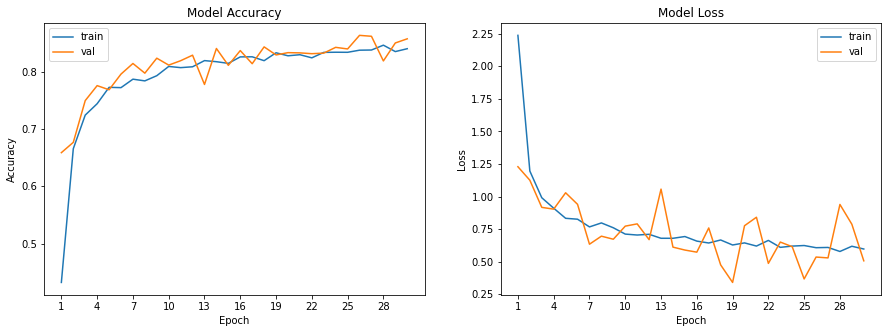

Training MLP took 750.680460691452 seconds


In [6]:
# Training
import time
start = time.time()
history = model.fit_generator(entrenamiento_generador_ff, steps_per_epoch=training_imgs//batch_size_ff, epochs=30, verbose=1, validation_data=validacion_generador_ff, validation_steps=val_imgs//batch_size_ff)
end = time.time()

loss, acc = model.evaluate_generator(test_generador_ff, test_imgs//batch_size_ff if test_imgs//batch_size_ff > 0 else 1, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

In [7]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v2()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 43)                731       
_________________________________________________________________
activation_2 (Activation)    (None, 43)               

Epoch 1/30
276/276 [==============================] - 25s 91ms/step - loss: 2.6495 - accuracy: 0.3327 - val_loss: 1.7037 - val_accuracy: 0.5051
Epoch 2/30
276/276 [==============================] - 25s 90ms/step - loss: 1.5488 - accuracy: 0.5521 - val_loss: 1.5488 - val_accuracy: 0.6110
Epoch 3/30
276/276 [==============================] - 25s 91ms/step - loss: 1.2352 - accuracy: 0.6431 - val_loss: 1.1124 - val_accuracy: 0.6915
Epoch 4/30
276/276 [==============================] - 25s 90ms/step - loss: 1.0765 - accuracy: 0.6867 - val_loss: 0.8748 - val_accuracy: 0.7414
Epoch 5/30
276/276 [==============================] - 25s 90ms/step - loss: 1.0065 - accuracy: 0.7102 - val_loss: 0.8260 - val_accuracy: 0.7739
Epoch 6/30
276/276 [==============================] - 24s 88ms/step - loss: 0.9395 - accuracy: 0.7324 - val_loss: 0.5983 - val_accuracy: 0.7454
Epoch 7/30
276/276 [==============================] - 24s 87ms/step - loss: 0.9532 - accuracy: 0.7305 - val_loss: 0.7599 - val_accuracy:

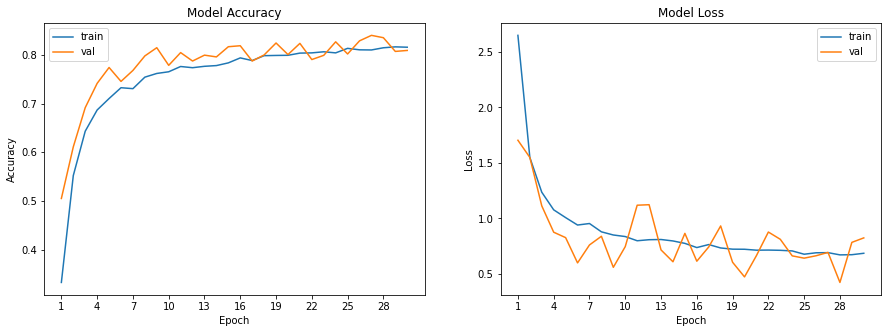

Training MLP took 733.3463289737701 seconds


In [8]:
# Training
import time
start = time.time()
history = model.fit_generator(entrenamiento_generador_ff, steps_per_epoch=training_imgs//batch_size_ff, epochs=30, verbose=1, validation_data=validacion_generador_ff, validation_steps=val_imgs//batch_size_ff)
end = time.time()

loss, acc = model.evaluate_generator(test_generador_ff, test_imgs//batch_size_ff if test_imgs//batch_size_ff > 0 else 1, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

In [9]:
# Feed forward dense model
# Here it is not allowed to use convolutional layers
# You may use any regularizacion (see class slides)

model = build_model_v3()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 43)                2795      
_________________________________________________________________
activation_3 (Activation)    (None, 43)               

Epoch 1/30
276/276 [==============================] - 30s 109ms/step - loss: 2.6702 - accuracy: 0.2689 - val_loss: 1.9105 - val_accuracy: 0.4203
Epoch 2/30
276/276 [==============================] - 31s 111ms/step - loss: 1.5609 - accuracy: 0.5326 - val_loss: 1.1466 - val_accuracy: 0.6605
Epoch 3/30
276/276 [==============================] - 31s 111ms/step - loss: 1.2027 - accuracy: 0.6385 - val_loss: 1.0146 - val_accuracy: 0.6810
Epoch 4/30
276/276 [==============================] - 31s 111ms/step - loss: 1.0461 - accuracy: 0.6769 - val_loss: 1.0190 - val_accuracy: 0.7136
Epoch 5/30
276/276 [==============================] - 30s 109ms/step - loss: 0.9190 - accuracy: 0.7170 - val_loss: 0.8136 - val_accuracy: 0.7409
Epoch 6/30
276/276 [==============================] - 30s 110ms/step - loss: 0.8201 - accuracy: 0.7424 - val_loss: 0.8173 - val_accuracy: 0.7522
Epoch 7/30
276/276 [==============================] - 30s 109ms/step - loss: 0.7497 - accuracy: 0.7638 - val_loss: 0.6481 - val_ac

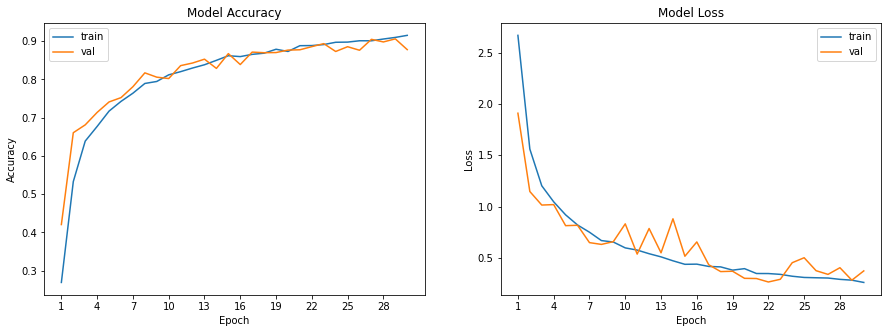

Training MLP took 902.6065473556519 seconds


In [10]:
# Training
import time
start = time.time()
history = model.fit_generator(entrenamiento_generador_ff, steps_per_epoch=training_imgs//batch_size_ff, epochs=30, verbose=1, validation_data=validacion_generador_ff, validation_steps=val_imgs//batch_size_ff)
end = time.time()

loss, acc = model.evaluate_generator(test_generador_ff, test_imgs//batch_size_ff if test_imgs//batch_size_ff > 0 else 1, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")

Definición de una red convolucional multicapa

In [11]:
batch_size_cnn = 512

entrenamiento_generador_cnn = entrenamiento_datagen.flow_from_directory(
    data_entrenamiento,
    target_size=(32, 32),
    batch_size=batch_size_cnn,
    class_mode='categorical')

validacion_generador_cnn = val_datagen.flow_from_directory(
    data_validacion,
    target_size=(32, 32),
    batch_size=batch_size_ff,
    class_mode='categorical')

test_generador_cnn = test_datagen.flow_from_directory(
    data_test,
    target_size=(32, 32),
    batch_size=batch_size_cnn,
    class_mode='categorical')

Found 35444 images belonging to 43 classes.
Found 2614 images belonging to 43 classes.
Found 2614 images belonging to 43 classes.


In [12]:
from keras.models import Model
from keras.layers import Dense, Activation, Flatten, Input, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D

def create_block(block_input, n_filtros):
    x = block_input
    for i in range(2):
        x = Conv2D(n_filtros, kernel_size=(3,3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
    return x

def build_conv(include_dropout = True): # De https://www.kaggle.com/mahtabshaan/autoencoder-as-feature-extractor-cifar10
    net_input = Input((32,32,3))

    block1 = create_block(net_input, 32)
    x = MaxPooling2D(pool_size=(2, 2))(block1)
    if include_dropout:
        x = Dropout(0.2)(x)

    block2 = create_block(x, 64)
    x = MaxPooling2D(pool_size=(2, 2))(block2)
    if include_dropout:
        x = Dropout(0.3)(x)

    block3 = create_block(x, 128)
    x = MaxPooling2D(pool_size=(2, 2))(block3)
    if include_dropout:
        x = Dropout(0.3)(block3)

    x = Flatten()(x)
    output = Dense(43, activation='softmax')(x)
    return Model(net_input, output)


In [15]:
# Convolutional Neural Network (CNN)
# Here you are allowed to use convolutional layers
# You may use also any regularizacion (see class slides)

import keras.backend as K

model = build_conv()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128 

Epoch 1/10
69/69 [==============================] - 166s 2s/step - loss: 1.4765 - accuracy: 0.5884 - val_loss: 3.8030 - val_accuracy: 0.0078
Epoch 2/10
69/69 [==============================] - 162s 2s/step - loss: 0.3858 - accuracy: 0.8710 - val_loss: 3.1105 - val_accuracy: 0.1859
Epoch 3/10
69/69 [==============================] - 163s 2s/step - loss: 0.2381 - accuracy: 0.9217 - val_loss: 3.5909 - val_accuracy: 0.2969
Epoch 4/10
69/69 [==============================] - 161s 2s/step - loss: 0.1777 - accuracy: 0.9412 - val_loss: 2.6209 - val_accuracy: 0.4094
Epoch 5/10
69/69 [==============================] - 161s 2s/step - loss: 0.1459 - accuracy: 0.9511 - val_loss: 2.4001 - val_accuracy: 0.4823
Epoch 6/10
69/69 [==============================] - 161s 2s/step - loss: 0.1196 - accuracy: 0.9613 - val_loss: 1.0703 - val_accuracy: 0.7281
Epoch 7/10
69/69 [==============================] - 162s 2s/step - loss: 0.0997 - accuracy: 0.9667 - val_loss: 0.1945 - val_accuracy: 0.9187
Epoch 8/10
69

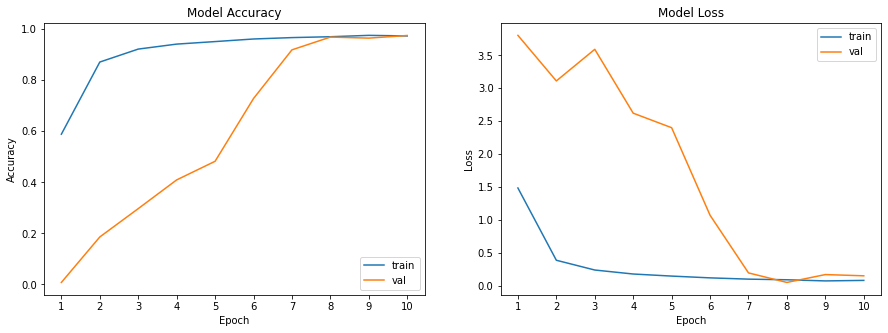

Training MLP took 1628.6801717281342 seconds


In [16]:
# Training
import time
start = time.time()
history = model.fit_generator(entrenamiento_generador_cnn, steps_per_epoch=training_imgs//batch_size_cnn, epochs=10, verbose=1, validation_data=validacion_generador_cnn, validation_steps=val_imgs//batch_size_cnn)
end = time.time()

loss, acc = model.evaluate_generator(test_generador_cnn, test_imgs//batch_size_cnn if test_imgs//batch_size_cnn > 0 else 1, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

plot_model_history(history)
print("Training MLP took " + str(end - start) + " seconds")